In [1]:
# import libraries we need
%pylab inline
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

Populating the interactive namespace from numpy and matplotlib


*This is for simulating correlation data using Monte Carlo.*

First, we make random choice to decide which light source is used.

'\nsingle photon source -> event 0\nthermal source -> event 1\nnothing detected -> event 2\n'

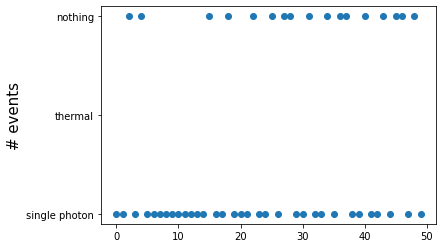

In [46]:
# determine which the light source for each detection

Ndetection = 50    # number of detections
p_sps = 0.70         #  probability of detecting a single photon source
p_thermal = 0.0      # probability of detecting a thermal light source
p_non = 0.30          # probability of getting nothing / 2nd photon is not in the range of abs time range
source = tf.random.categorical(tf.math.log([[p_sps,p_thermal,p_non]]), Ndetection)
plt.scatter(np.arange(Ndetection),source[0])
plt.ylabel('# events',fontsize=15)
plt.yticks([0,1,2],['single photon','thermal','nothing'])
'''
single photon source -> event 0
thermal source -> event 1
nothing detected -> event 2
'''


---

Next, we simulate the single photon source case.

In [231]:
uni_prob

<tf.Tensor: shape=(401,), dtype=float32, numpy=
array([0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025

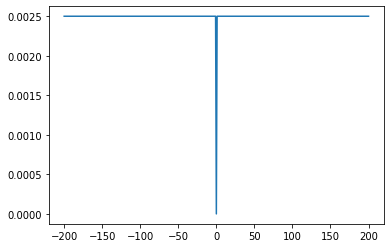

In [230]:
total_bin = 400      # number of total time bins
bin_number = tf.range(-1 * total_bin//2,total_bin//2+1,delta=1,dtype=float32)

tbin_n = tf.constant(np.linspace(min(bin_number),-1,total_bin//2),dtype=float32)
tbin_p = tf.constant(np.linspace(1,max(bin_number),total_bin//2),dtype=float32)

uni_dist = tfd.MixtureSameFamily(
    mixture_distribution = tfd.Categorical(probs=[0.5, 0.5]),
    components_distribution = tfd.Uniform(low=[min(bin_number),1],high=[0,max(bin_number)+1])
                       )
uni_prob = uni_dist.prob([tbin_n,tbin_p])
uni_prob = tf.concat([uni_prob[0],[0],uni_prob[1]],0)
plt.plot(bin_number,uni_prob)
plt.show()

In [162]:

d2=tfd.Uniform(low=1,high=100)
x1=np.linspace(-100,-1,100)
d=tfd.MixtureSameFamily(
    mixture_distribution = tfd.Categorical(probs=[0.5, 0.5]),
    components_distribution = tfd.Uniform(low=[-101,1],high=[-1,101])
                       )
d.prob([3,4])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.005, 0.005], dtype=float32)>

In [155]:
x1=np.linspace(-100,-1,100)
x2=np.linspace(1,100,100)

In [156]:
d.prob(5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.005>

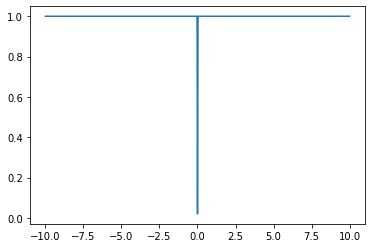

In [32]:

dist = tfd.Normal(loc=0.0,scale=0.01)
                    
x = np.linspace(-10.,10.,5000,dtype=float)
plt.plot(x,-dist.prob(x)/dist.prob(0)+1)

In [5]:
import tensorflow_probability as tfp
tfd = tfp.distributions

# Define a single scalar Normal distribution.
dist = tfd.Normal(loc=0., scale=3.)

# Evaluate the cdf at 1, returning a scalar.
dist.cdf(1.)

# Define a batch of two scalar valued Normals.
# The first has mean 1 and standard deviation 11, the second 2 and 22.
dist = tfd.Normal(loc=[-2, 2.], scale=[1.,1])

# Evaluate the pdf of the first distribution on 0, and the second on 1.5,
# returning a length two tensor.
dist.prob([-2.,2])

# Get 3 samples, returning a 3 x 2 tensor.
#dist.sample([5])


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.3989423, 0.3989423], dtype=float32)>

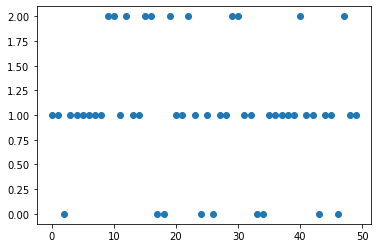

In [176]:
# samples has shape [1, 5], where each value is either 0 or 1 with equal
# probability.
samples = tf.random.categorical([[pthermal,psps,pnon]], 50)
plt.scatter(np.arange(50),samples[0])

In [129]:
samples.numpy()

array([[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 0]])